<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220809_K_means02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-means clustering을 활용한 데이터 분류 실습**
---
> IRIS 데이터 분류하기

#### **라이브러리 import**


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

####**데이터 로드 및 확인**

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
data = iris.data[:, [0, 1]]
data[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

#### **클러스트링 수행 및 시각화**


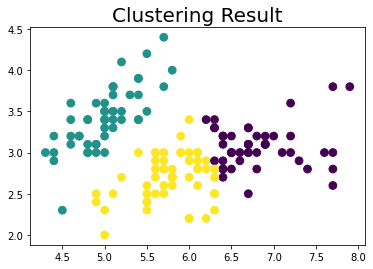

In [13]:
kmeans_iris = KMeans(n_clusters=3).fit(data)

labels = kmeans_iris.labels_
plt.title("Clustering Result", fontsize=20)
plt.scatter(data[:,0], data[:,1], c = labels, s=60)         # 산점도에서 0번, 1번 칼럼을 넣고, lables에 따라 색 분류

#### **분류 정확도 확인**

In [17]:
target = iris.target
df = pd.DataFrame({'lables': labels, 'target': target})
# lables와 target 을 y축, x축으로 하여 테이블 생성
# 단 lables의 0 1 2와 target의 0 1 2의 의미가 서로 다르다. 이 경우 lables 0 1 2 는 각각 target 2 0 1과 매칭된다.
ct = pd.crosstab(df['lables'], df['target'])  
ct         

target,0,1,2
lables,,,
0,0,12,35
1,50,0,0
2,0,38,15


#### **최적의 K값 찾기**

In [21]:
num_clusters = list(range(2,9))# 2~8까지 검토
inertias = []                  # 클러스터링된 데이터 간 응집도를 파악하기 위함 응집도가 높을수록 클러스터링이 잘 된 셈

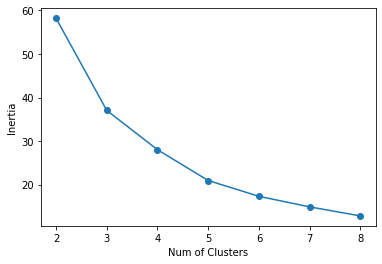

In [22]:
for i in num_clusters:
  model = KMeans(n_clusters = i)
  model.fit(data)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel("Num of Clusters")
plt.ylabel("Inertia")
plt.show()